# SI 618 Homework 10

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

## The data:

* https://www.kaggle.com/terminus7/pokemon-challenge

> We'll continue to use the dataset from one of the previous homeworks. This data set contains two files.
> 
> pokemon.csv: 800 Pokemon, including their number, name, first and second type, basic stats: HP, Attack, Defense, Special Attack, Special Defense, the game generation they were introduced in, and whether they had the "legendary" status.
> 
> combats.csv: 50,000 simulated encounters between pairs of pokemon with the first pokemon to act, the other pokemon and the winner 
>
> For this homework, we will use both the pokemon.csv and combats.csv files

#### Guidance

- ##### Show your code
- ##### <b>Explain your answer
- ##### <b>Make sure that your visualizations are properly formatted with axis and legend names and titles wherever necessary

In [2]:
pokemon = pd.read_csv('pokemon.csv', index_col=0)
pokemon.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
#                                                                               
1      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
2        Ivysaur  Grass  Poison  60      62       63       80       80     60   
3       Venusaur  Grass  Poison  80      82       83      100      100     80   
4  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
5     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  
#                         
1           1      False  
2           1      False  
3           1      False  
4           1      False  
5           1      False

In [3]:
combats = pd.read_csv("combats.csv")
combats.head()

First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151

### Q1 - 15 points
- ##### Calculate the total ability points for each pokemon (sum of all ability points - 'HP', 'Attack', 'Defense', 'Sp. Atk','Sp. Def' and 'Speed'). Plot the distribution of various ability points (including the total ability points) for different pokemon types. Based on these plots, write a one-line description for each pokemon type. For simplicity, let us consider only type 1 for considering the different pokemon types.

In [4]:
pokemon["total"] = pokemon["HP"] + pokemon["Attack"] + pokemon["Defense"] + pokemon["Sp. Atk"] + pokemon["Sp. Def"] + pokemon["Speed"]
type_list = list(set(pokemon["Type 1"]))
ability_list = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "total"]

def plot_ability_type(p_type):
    temp = pokemon[pokemon["Type 1"] == p_type]
    ax = temp[ability_list].plot.density(figsize = (16, 8), linewidth = 2)
    ax.set_xlabel("Ability Score")
    ax.set_title(f'Distribution of ability points for {p_type} Type Pokemon')

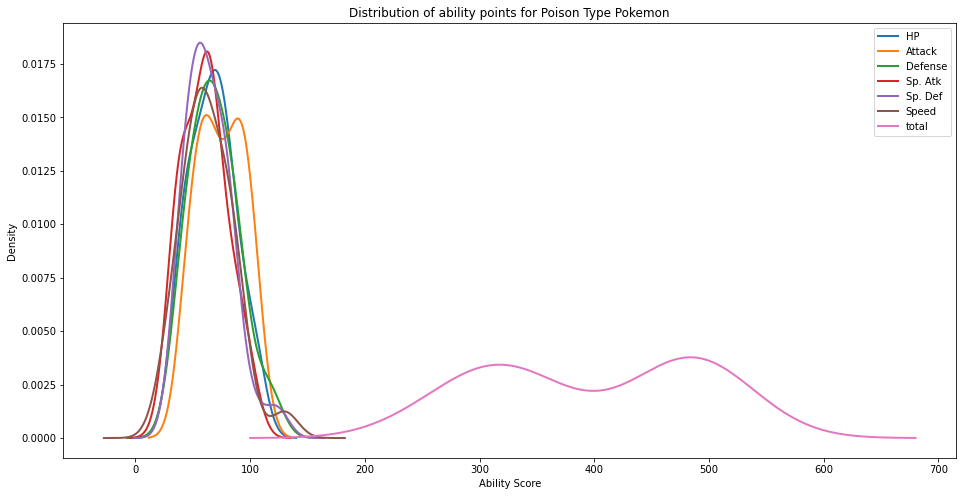

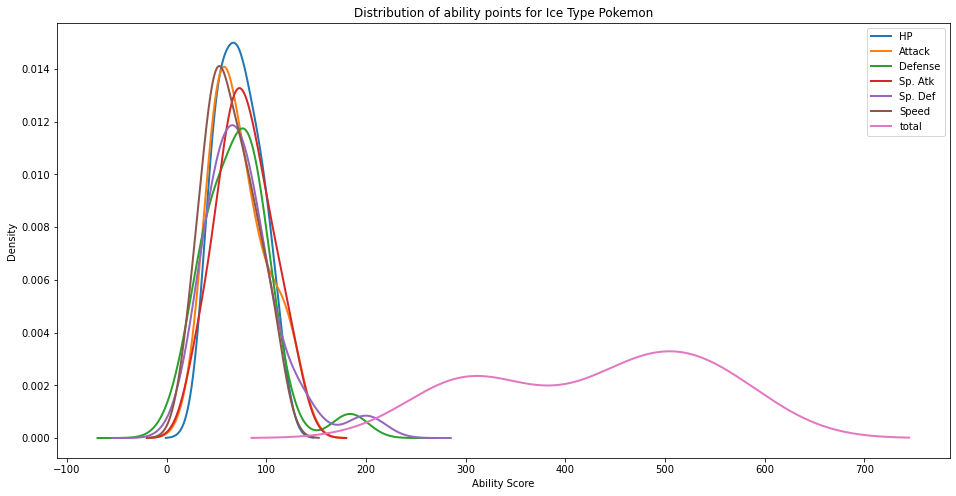

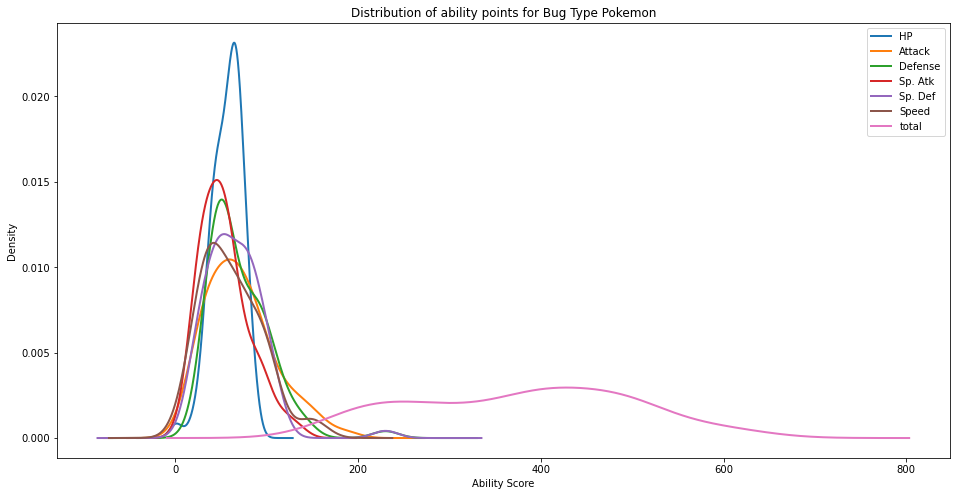

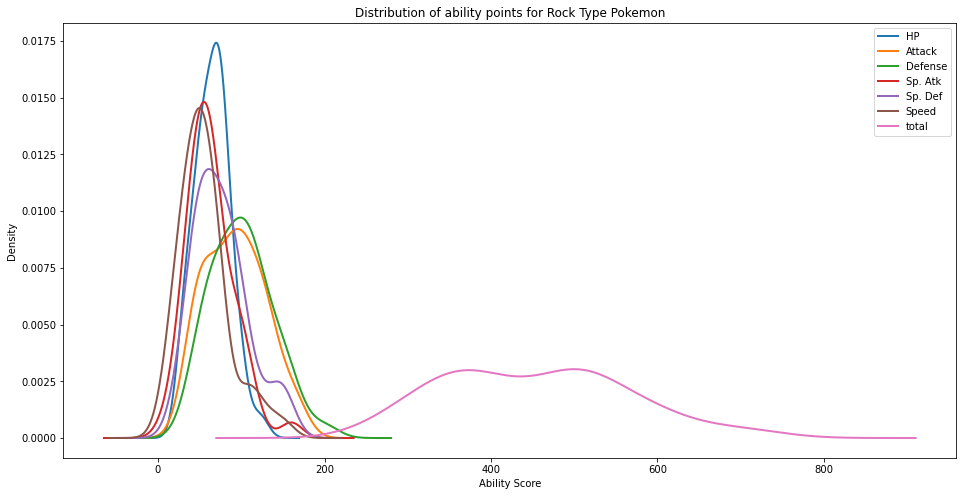

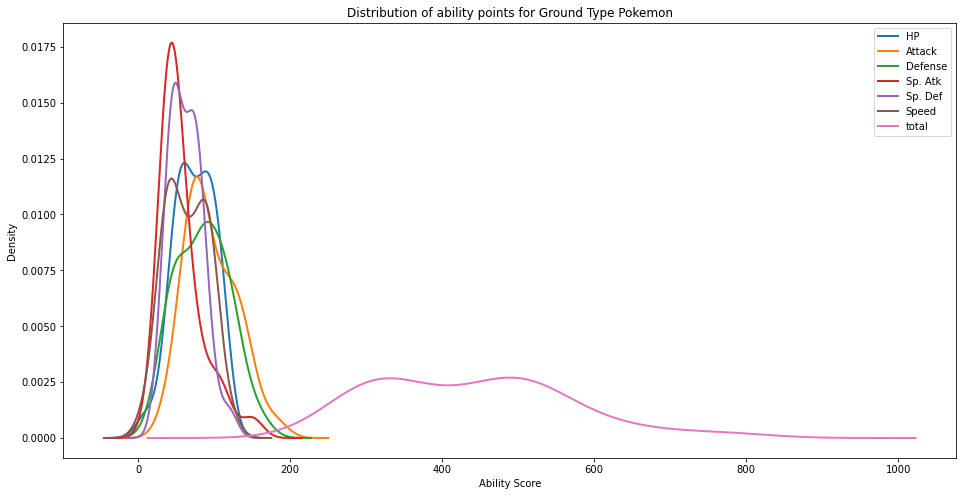

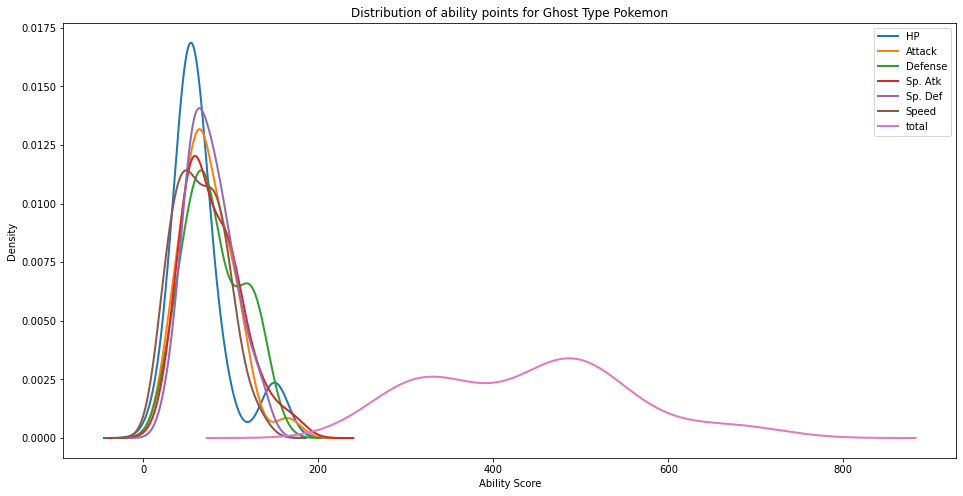

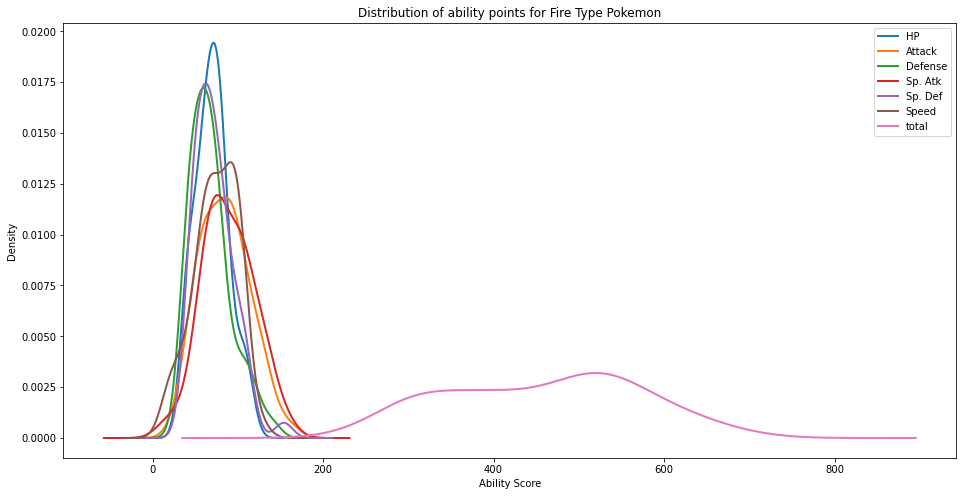

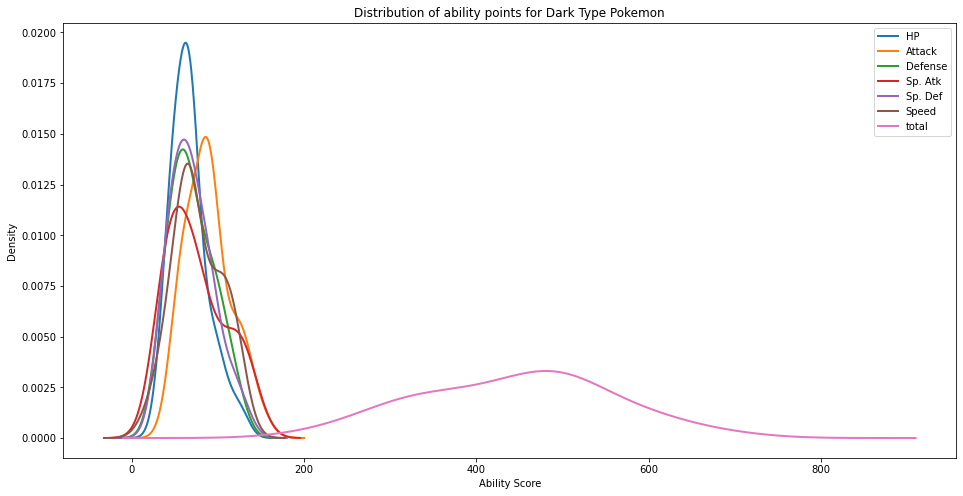

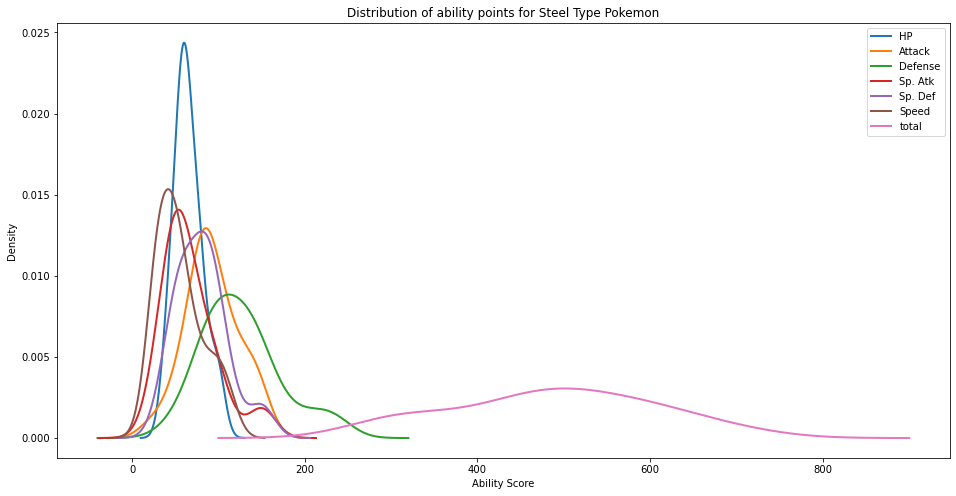

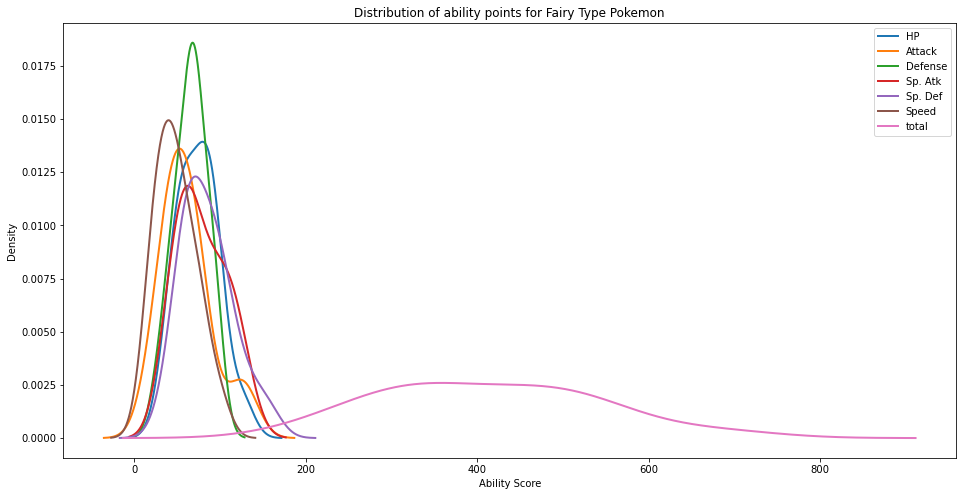

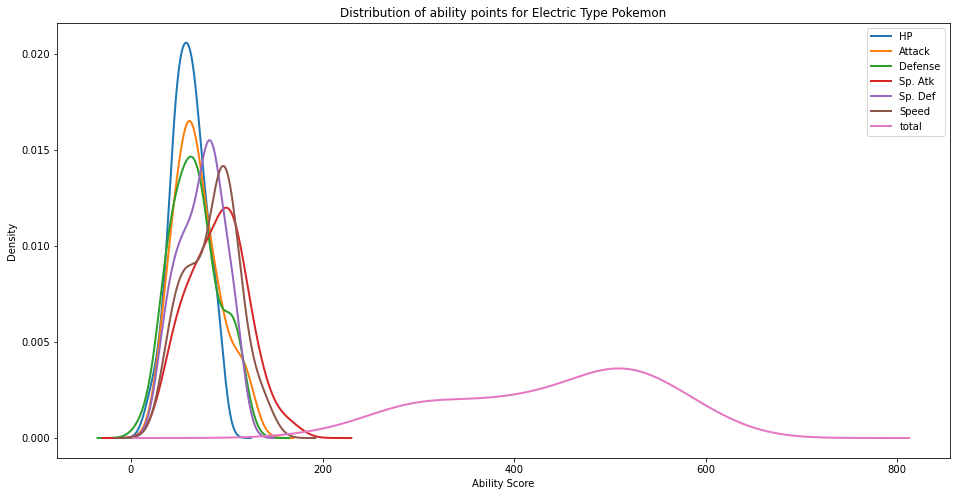

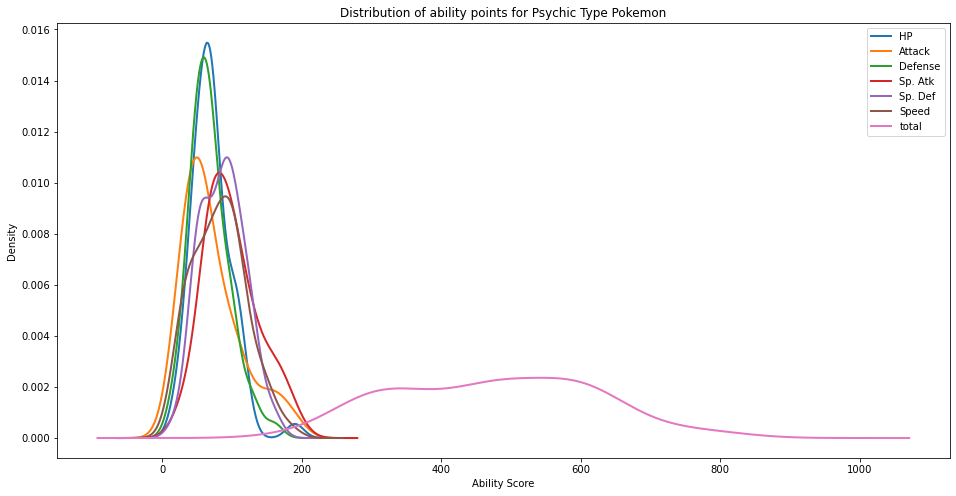

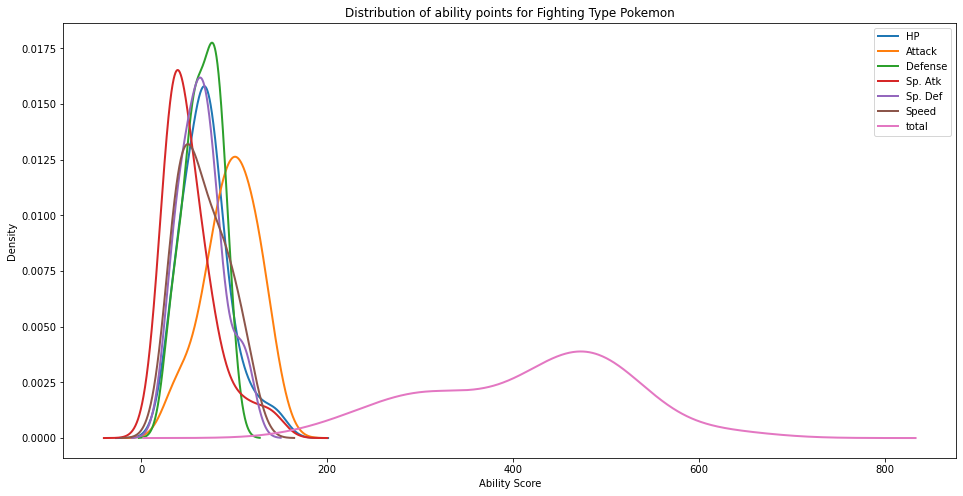

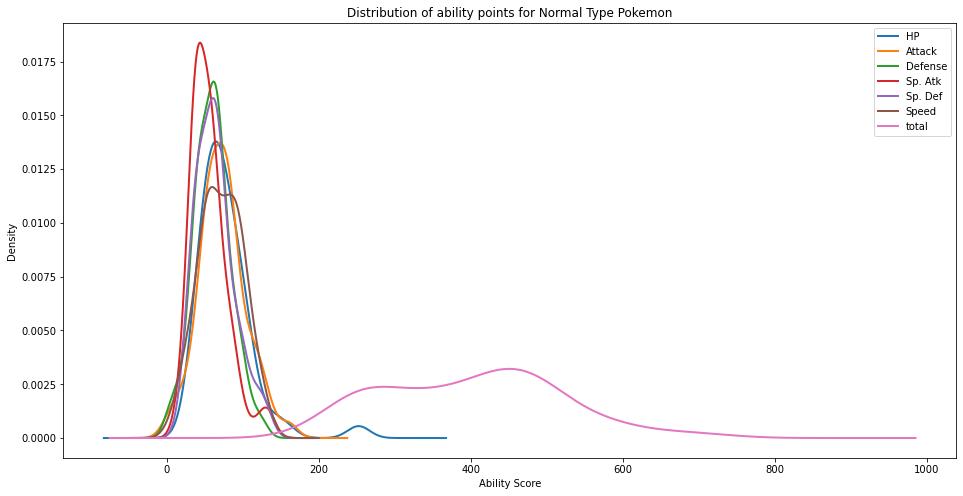

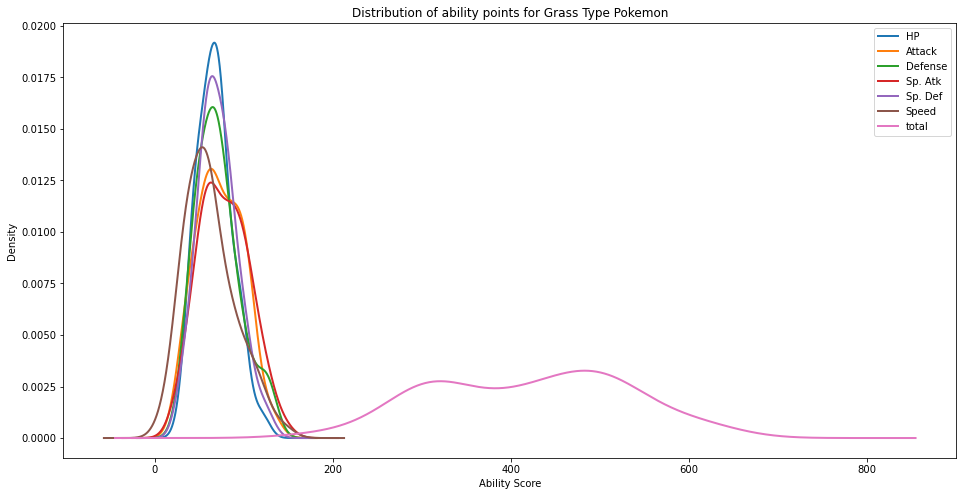

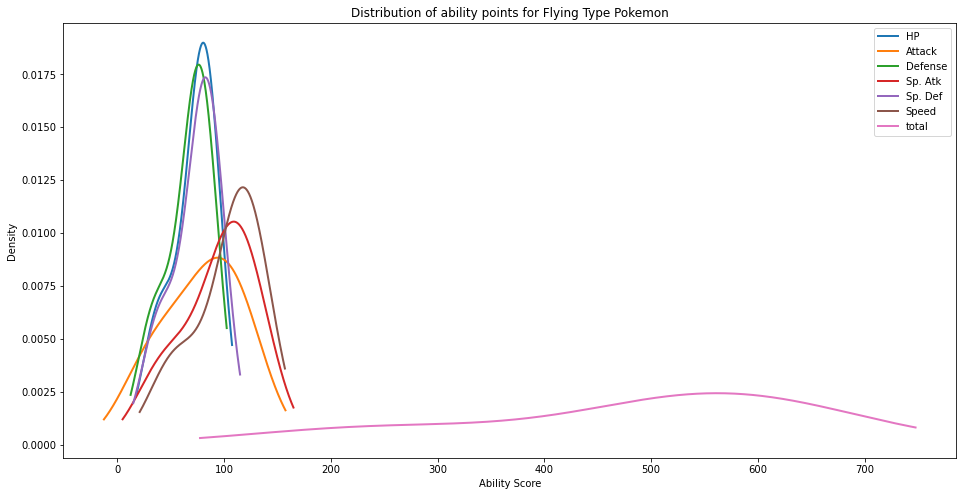

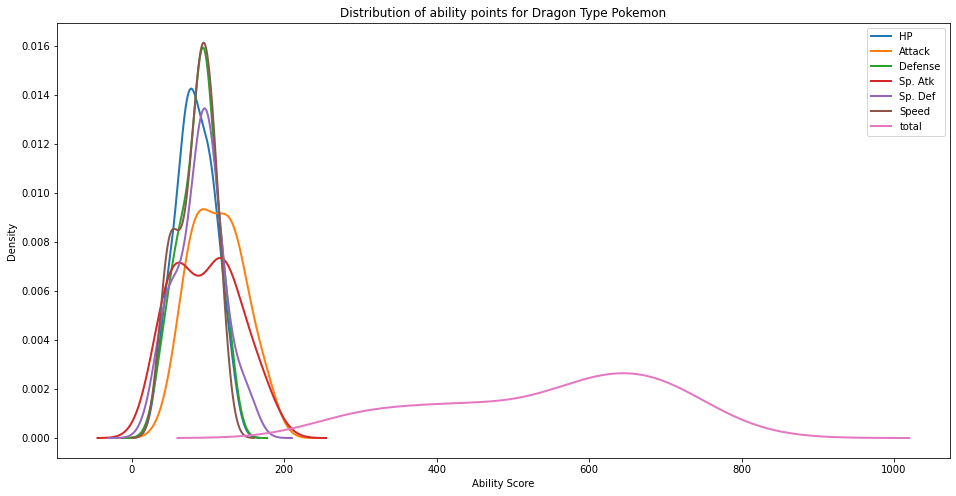

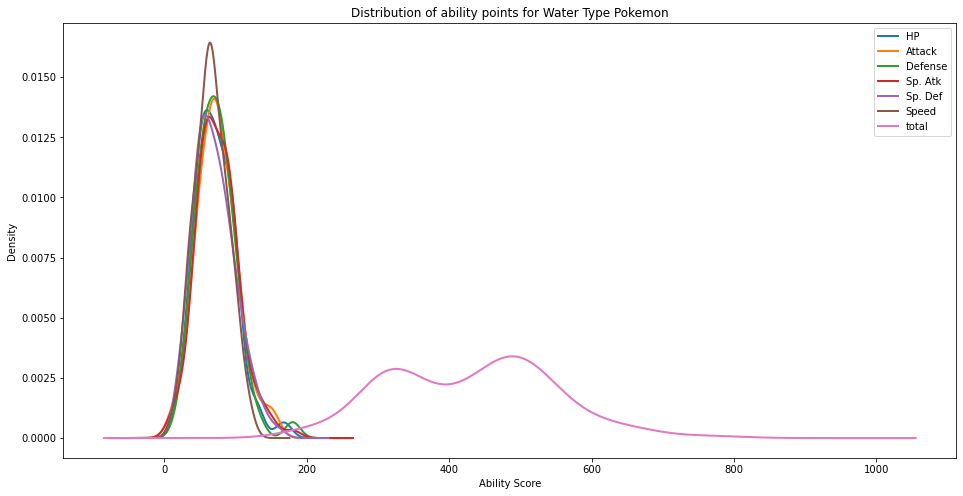

In [5]:
for poke_type in type_list:
    plot_ability_type(poke_type)

From the plots above, we can find that:

- For `Normal` type pokemon, they ususally have a fewer Sp. Atk ability and a higher Speed ability comparing to its other abilitys. Their total ability points is relatively low. 
- For `Dark` type pokemon, they ususally have a fewer HP ability and a higher Attack ability comparing to its other abilitys. Their total ability points is relatively high. 
- For `Grass` type pokemon, they ususally have a fewer Speed ability and a higher Sp. Atk abiltiy comparing to its other abilitys. Their total ability points is around 400. 
- For `Ground` type pokemon, they ususally have a fewer Sp. Atk ability and a higher Attack ability comparing to its other abilitys. Their total ability points is around 400. 
- For `Electric` type pokemon, they ususally have a fewer HP ability and a higher Sp. Atk ability comparing to its other abilitys. Their total ability points is relatively high, around 500. 
- For `Fighting` type pokemon, they ususally have a fewer Sp. Atk ability and a higher Attack ability comparing to its other abilitys. Their total ability points is relatively high, around 450. 
- For `Steel` type pokemon, they ususally have a fewer Speed ability and a higher Defense ability comparing to its other abilitys. Their total ability points is relatively high, around 500. 
- For `Ice` type pokemon, they ususally have a fewer Sp. Atk ability and a higher Sp. Atk ability comparing to its other abilitys. Their total ability points is relatively high, around 500. 
- For `Water` type pokemon, they ususally have a fewer Speed ability and a higher Sp. Atk ability comparing to its other abilitys. Their total ability points is relatively high, around 450. 
- For `Bug` type pokemon, they ususally have a fewer Sp. Atk ability and a higher Attack ability comparing to its other abilitys. Their total ability points is relatively high, around 450. 
- For `Poison` type pokemon, they ususally have a fewer Sp. Atk ability and a higher Attack ability comparing to its other abilitys. Their total ability points is relatively high, around 450. 
- For `Dragon` type pokemon, they ususally have a fewer Hp ability and a higher Attack ability comparing to its other abilitys. Their total ability points is relatively high, around 600. 
- For `Flying` type pokemon, they ususally have a fewer Defense ability and a higher Speed ability comparing to its other abilitys. Their total ability points is relatively high, around 550. 
- For `Fairy` type pokemon, they ususally have a fewer Speed ability and a higher Sp. Atk ability comparing to its other abilitys. Their total ability points is around 400. 
- For `Ghost` type pokemon, they ususally have a fewer Hp ability and a higher Defense ability comparing to its other abilitys. Their total ability points is relatively high, around 450. 
- For `Psychic` type pokemon, they ususally have a fewer Attack ability and a higher Sp. Atk ability comparing to its other abilitys. Their total ability points is relatively high, around 450. 
- For `Fire` type pokemon, they ususally have a fewer Defense ability and a higher Sp. Atk ability comparing to its other abilitys. Their total ability points is relatively high, around 450. 
- For `Rock` type pokemon, they ususally have a fewer Speed ability and a higher Defense ability comparing to its other abilitys. Their total ability points is relatively high, around 450. 





### Q2 - 20 points
- ##### Developers sometimes release only certain types of pokemon in each generation while there are some pokemon types that are consistently used in each generation that are present in both type1 and type2 features. What are the pokemon types that get featured in both type 1 and type 2 attributes across all generations? 
- Hint: Use cross tabulations 

In [6]:
ct1 = pd.crosstab(pokemon["Type 1"], pokemon["Generation"])
ct1

Generation   1   2   3   4   5   6
Type 1                            
Bug         14  12  12  10  18   3
Dark         0   6   6   3  13   3
Dragon       3   0  12   4   9   4
Electric     9   7   5  12   8   3
Fairy        2   5   0   1   0   9
Fighting     7   2   5   3   7   3
Fire        14   8   8   5   9   8
Flying       0   0   0   0   2   2
Ghost        4   1   5   7   5  10
Grass       13   9  13  15  15   5
Ground       8   3   7   4  10   0
Ice          2   4   7   3   6   2
Normal      24  15  18  18  19   4
Poison      14   1   3   6   2   2
Psychic     11   7  12   8  14   5
Rock        10   5   8   6   6   9
Steel        0   3  12   3   4   5
Water       31  18  27  13  18   5

In [7]:
ct2 = pd.crosstab(pokemon["Type 2"], pokemon["Generation"])
ct2

Generation   1   2   3   4   5   6
Type 2                            
Bug          0   0   2   1   0   0
Dark         1   2   7   4   3   3
Dragon       1   2   3   4   3   5
Electric     0   2   0   0   4   0
Fairy        3   3   8   1   3   5
Fighting     2   2   4   7  10   1
Fire         0   3   1   1   7   0
Flying      23  19  14  16  19   6
Ghost        0   0   3   2   4   5
Grass        2   1   5   2   5  10
Ground       6   8   9   8   2   2
Ice          3   1   0   5   3   2
Normal       0   0   0   0   0   4
Poison      22   3   2   2   5   0
Psychic      7   3  16   2   2   3
Rock         2   3   4   1   4   0
Steel        2   3   0   9   8   0
Water        4   0   4   2   0   4

From the table above, we can find that the pokemon types that get featured in both type 1 and type 2 attributes across all generations are:
- `Fighting`
- `Grass`
- `Psychic`

### Q3 - 20 points - You must use visualizations to answer both questions

##### 1. Visualize how the distribution of ability points differ across generations with one plot per ability type and different colors for each generation. 

##### Hint: Use a single plot for each ability type with a different colored line for the distribution of ability points for each generation. 

##### Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation? - 15 points
##### 2. Which generation has the most number of legendary pokemons and which generation has the least number of regular pokemons? Please answer this question using a single graph. You can pick any suitable graph of your choice. - 5 points

Text(0.5, 1.0, 'Distribution of HP across generations')

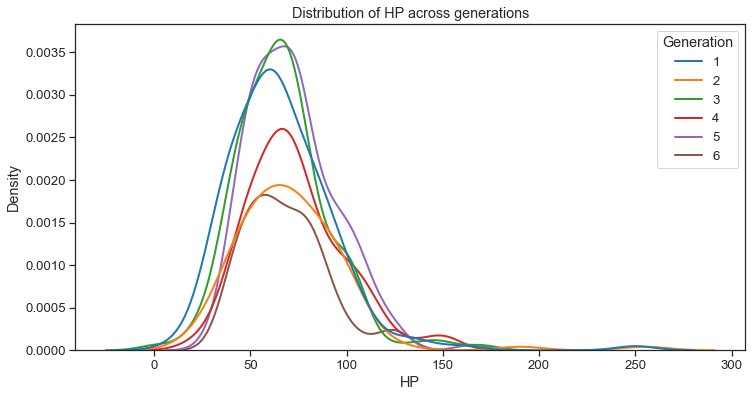

In [8]:
# 1
sns.set(rc={"figure.figsize": (12, 6)})
sns.set(style='white')
sns.set(context='notebook', style='ticks', font_scale=1.2)
ax = sns.kdeplot(data=pokemon, x="HP", hue="Generation",palette="tab10",linewidth = 2)
ax.set_title("Distribution of HP across generations")

We can see that the average HP of several generations of Pokémon does not differ a lot, but the first generation and the second generation have some extremely high HP individuals.

Text(0.5, 1.0, 'Distribution of Attack across generations')

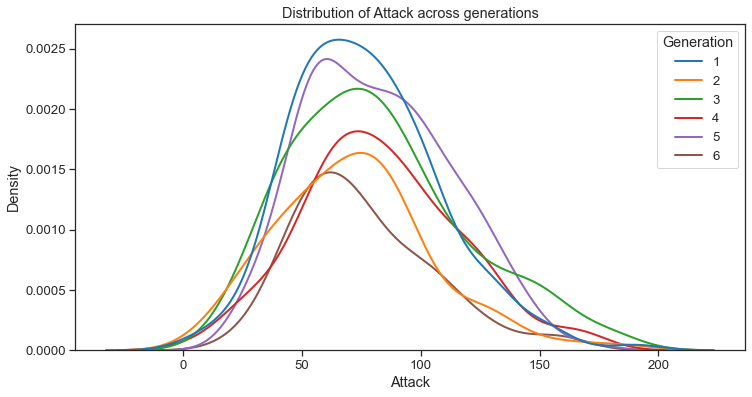

In [9]:
ax = sns.kdeplot(data=pokemon, x="Attack", hue="Generation",palette="tab10",linewidth = 2)
ax.set_title("Distribution of Attack across generations")

We can see that the average value of the Attack of several generations of Pokémon does not differ a lot, but overall with the increase in generation, the data distribution of the Attack is more spread out

Text(0.5, 1.0, 'Distribution of Defense across generations')

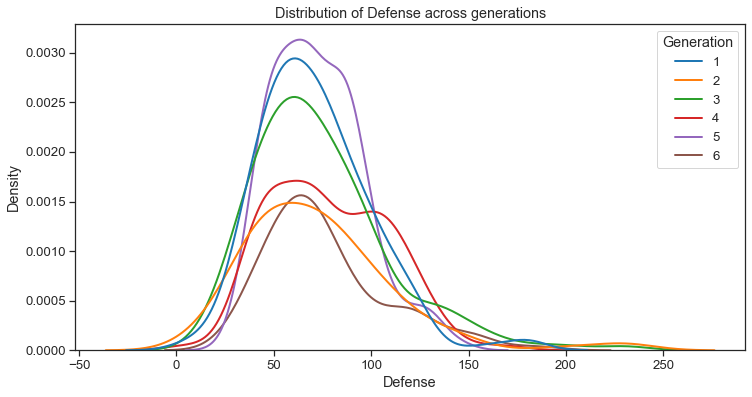

In [10]:
ax = sns.kdeplot(data=pokemon, x="Defense", hue="Generation",palette="tab10",linewidth = 2)
ax.set_title("Distribution of Defense across generations")

We can see that the average value of the Defense of several generations of Pokémon is not very different, although there are some individuals with extremely large Defense values in the second and third generation.

Text(0.5, 1.0, 'Distribution of Sp. Atk across generations')

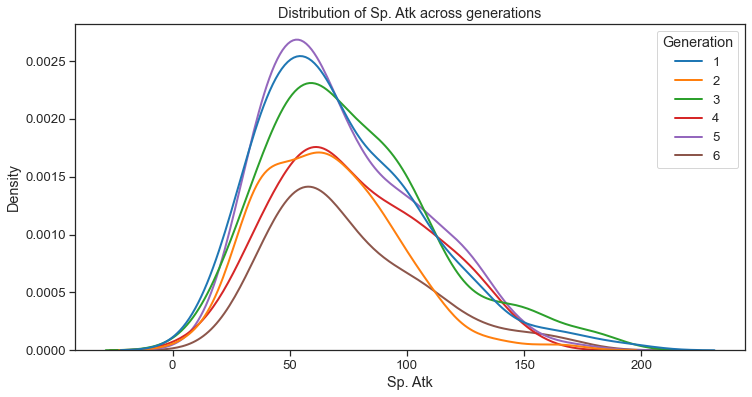

In [11]:
ax = sns.kdeplot(data=pokemon, x="Sp. Atk", hue="Generation",palette="tab10",linewidth = 2)
ax.set_title("Distribution of Sp. Atk across generations")

We can see that the average value of the Sp. Atk of several generations of Pokémon does not differ a lot, although there are some individuals with extremely large Sp. Atk values in the first and third generation.

Text(0.5, 1.0, 'Distribution of Sp. Def across generations')

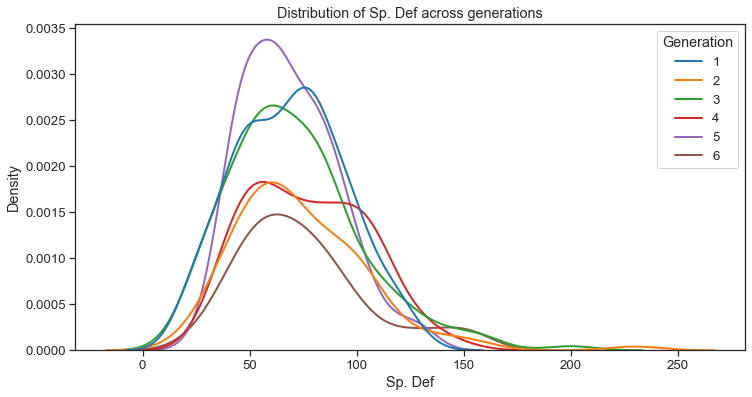

In [12]:
ax = sns.kdeplot(data=pokemon, x="Sp. Def", hue="Generation",palette="tab10",linewidth = 2)
ax.set_title("Distribution of Sp. Def across generations")

We can see that the average value of the Sp. Def of several generations of Pokémon does not differ a lot, although there are some individuals with extremely large Sp. Def values in the second and third generation.

Text(0.5, 1.0, 'Distribution of Speed across generations')

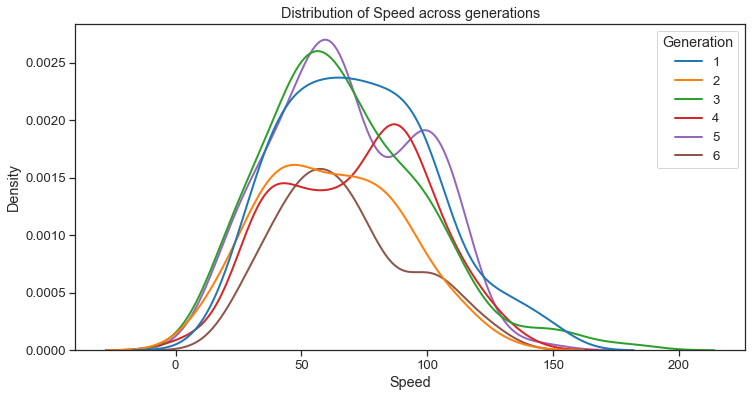

In [13]:
ax = sns.kdeplot(data=pokemon, x="Speed", hue="Generation",palette="tab10",linewidth = 2)
ax.set_title("Distribution of Speed across generations")

We can see that the average value of the Speed of several generations of Pokémon does not differ a lot, although there are some individuals with extremely large Speed values in the third generation.

Text(0.5, 1.0, 'Distribution of total ability points across generations')

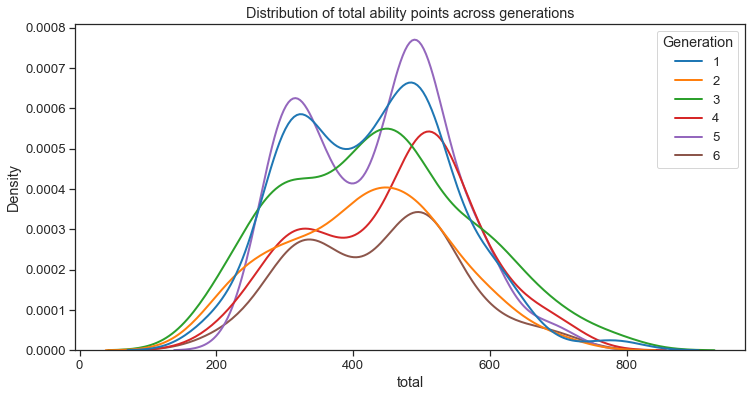

In [14]:
ax = sns.kdeplot(data=pokemon, x="total", hue="Generation",palette="tab10",linewidth = 2)
ax.set_title("Distribution of total ability points across generations")

We can see that the average value of the total ability points of several generations of Pokémon does not differ a lot, although there are some individuals with extremely large total ability points values in the first and third generation.

#### Answer:

Overall, I think the designers did not want to make a particularly big difference in the ability points of several generations of Pokémon, because the median value and the distribution of the ability points of each generation of Pokémon is at about the same level. 

But there are some generations that have individuals with significantly larger value of ability points.
For example, the first generation and the second generation of Pokémon have individuals with extremely large HP points; the second generation and the third generation of Pokémon have individuals with extremely large Sp. Def points; etc.

Text(0.5, 1.0, 'Number of legendary and regular pokemons in the generations')

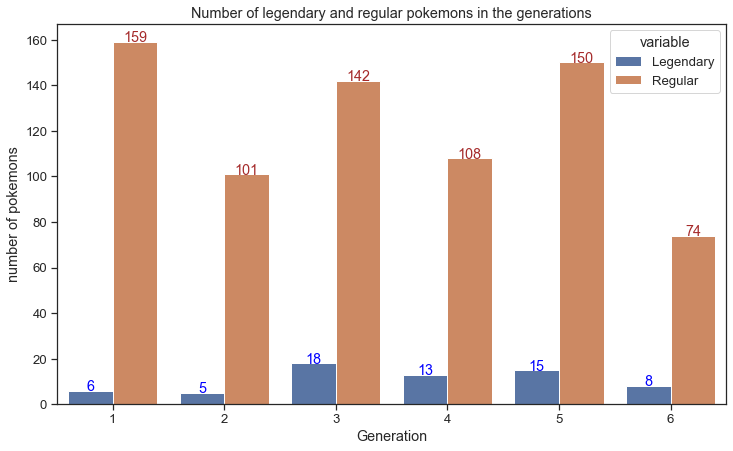

In [15]:
# 2
gen_leg = pokemon[pokemon["Legendary"] == True].groupby("Generation")[["Legendary"]].count().reset_index()
gen_reg = pokemon[pokemon["Legendary"] == False].groupby("Generation")[["Name"]].count().rename(columns = {"Name": "Regular"}).reset_index()
gen = pd.merge(gen_leg, gen_reg, on = "Generation")
gen = pd.melt(gen,id_vars=["Generation"],value_vars=["Legendary", "Regular"])

sns.set(rc={"figure.figsize": (12, 7)})
sns.set(style="whitegrid")
sns.set(context='notebook', style='ticks', font_scale=1.2)
ax = sns.barplot(data = gen, x = "Generation", y = "value", hue = "variable")
for index, row in gen_leg.iterrows():
    ax.text(row.Generation-1.2,row.Legendary, round(row.Legendary,1), color='blue', ha="center")
for index, row in gen_reg.iterrows():
    ax.text(row.Generation-0.8,row.Regular, round(row.Regular,1), color='brown', ha="center")
ax.set_ylabel("number of pokemons")
ax.set_title("Number of legendary and regular pokemons in the generations")

#### Answer:
- `Generation 3` has the most number of legendary pokemons (18).
- `Generation 6` has the least number of regular pokemons (74).

### Q4 - 20 points
- ##### In the encounters between a regular pokemon and a legendary pokemon, who is more likely to win? 
- ##### In such encounters, is there a statistical significance ($\alpha=0.05$) between the legendary pokemon status and the winning status of a pokemon?

Text(0.5, 1.0, 'The number of regular pokemon vs. legendary pokemon combats won by legendary and regular pokemons')

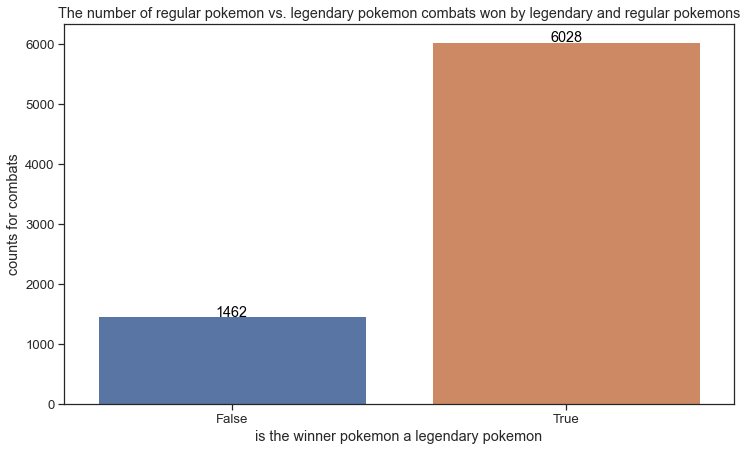

In [16]:
# 1

# get the combats between regular and legendary pokemons
leg_poke_ind = pokemon[pokemon["Legendary"] == True].index
reg_poke_ind = pokemon[pokemon["Legendary"] == False].index
combats["is_first_legendary"] = [p in leg_poke_ind for p in combats["First_pokemon"]]
combats["is_second_legendary"] = [p in leg_poke_ind for p in combats["Second_pokemon"]]
combats["is_RvsL"] = [f + s == 1 for f, s in zip(combats["is_first_legendary"], combats["is_second_legendary"])]

# judge whether the legendary pokemon wins in the combats between a regular pokemon and a legendary pokemon
combats_rvsl = combats[combats["is_RvsL"] == True]
is_legendary_win = []
for index, row in combats_rvsl.iterrows():
    if (row["Winner"] == row["First_pokemon"] and row["is_first_legendary"] == True) or (row["Winner"] == row["Second_pokemon"] and row["is_second_legendary"] == True):
        is_legendary_win.append(True)
    else:
        is_legendary_win.append(False)
combats_rvsl = combats_rvsl.copy()
combats_rvsl["is_legendary_win"] = is_legendary_win

# plot to see which pokemon is more likely to win
leg_win = pd.DataFrame(combats_rvsl["is_legendary_win"].value_counts()).reset_index()
sns.set(rc={"figure.figsize": (12, 7)})
sns.set(style="whitegrid")
sns.set(context='notebook', style='ticks', font_scale=1.2)
ax = sns.barplot(data = leg_win, x = "index", y = "is_legendary_win")
for index, row in leg_win.iterrows():
    ax.text(row["index"],row.is_legendary_win, round(row.is_legendary_win,2), color='black', ha="center")
ax.set_xlabel("is the winner pokemon a legendary pokemon")
ax.set_ylabel("counts for combats")
ax.set_title("The number of regular pokemon vs. legendary pokemon combats won by legendary and regular pokemons")

#### Answer:
From the plot above, we can see that the legendary pokemons wins 6028 combats in the encounters between a regular pokemon and a legendary pokemon, while the regular pokemons only wins 1462 which is much lower than 6028. Therefore, in the encounters between a regular pokemon and a legendary pokemon, `the legendary pokemon` is more likely to win.

In [17]:
# 2
is_first_win = []
is_second_win = []
for index, row in combats_rvsl.iterrows():
    if (row["Winner"] == row["First_pokemon"]):
        is_first_win.append(True)
        is_second_win.append(False)
    else:
        is_first_win.append(False)
        is_second_win.append(True)
combats_rvsl = combats_rvsl.copy()
combats_rvsl["is_first_win"] = is_first_win
combats_rvsl["is_second_win"] = is_second_win

ct = pd.crosstab(combats_rvsl["is_first_legendary"], combats_rvsl["is_first_win"])
ct

is_first_win        False  True
is_first_legendary             
False                3100   653
True                  809  2928

In [18]:
# significant test
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
ex = pd.DataFrame(ex)
ex.index = ['False', 'True']
ex.columns = ['False', 'True']
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
ex

chi2 =  2785.554960731659
p-val =  0.0
degree of freedom =  1
Expected:


False         True
False  1958.675167  1794.324833
True   1950.324833  1786.675167

#### Answer:

According to the test result above, since p-value < $\alpha$, we can reject the null hypothesis, indicating that there is a statistical significance ($\alpha$=0.05) between the legendary pokemon status and the winning status of a pokemon.

### Q5 - 10 points

##### Across each generation, compare the distribution of the total number of combats/matches for legendary and regular pokemons with a suitable figure (you must use a single plot for this task. Hint: This plot was already used in the lab). Is there a trend in this relationship over generations?

Text(0.5, 1.0, 'The number of regular pokemon vs. legendary pokemon combats won by legendary and regular pokemons')

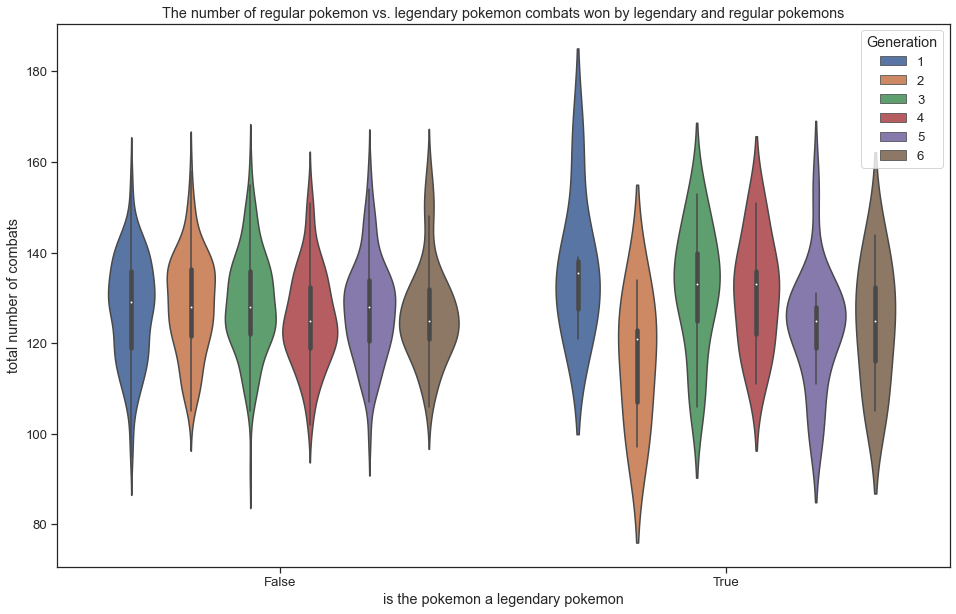

In [19]:
# data manipulation
com_as_1 = combats.groupby("First_pokemon")["Winner"].count()
com_as_2 = combats.groupby("Second_pokemon")["Winner"].count()
com_tot = com_as_1 + com_as_2
pokemon["tot_combats"] = com_tot

# plot
sns.set(rc={"figure.figsize": (16, 10)})
sns.set(style="whitegrid")
sns.set(context='notebook', style='ticks', font_scale=1.2)
ax = sns.violinplot(x="Legendary", y="tot_combats", hue="Generation", data=pokemon)
ax.set_xlabel("is the pokemon a legendary pokemon")
ax.set_ylabel("total number of combats")
ax.set_title("The number of regular pokemon vs. legendary pokemon combats won by legendary and regular pokemons")


#### Answer:
- For regular pokemons, with the change of generation, the distribution of total number of combats does not show much difference. Besides, they are all relatively concentrated.
- For legendary pokemons, except of the second generation, the total number of combats has a slightly downward trend. Besides, the distributions are relatively dispersed.

### Q6 - 15 points
#### Use an appropriate plot to see if there a clear association between the pokemon's generation and the winning status in the combats. Are certain pokemon generations distinctly more associated with wins than others? Analyse this separately for First_pokemon and Second_pokemon.

- Hint: You can use the dataframe you would have created with joins in Q4

In [20]:
# data manipulation
first_poke_gen = []
second_poke_gen = []
is_first_win = []
is_second_win = []
for index, row in combats.iterrows():
    first_poke_gen.append(pokemon.loc[row["First_pokemon"]]["Generation"])
    second_poke_gen.append(pokemon.loc[row["Second_pokemon"]]["Generation"])
    if (row["Winner"] == row["First_pokemon"]):
        is_first_win.append("win")
        is_second_win.append("lose")
    else:
        is_first_win.append("lose")
        is_second_win.append("win")
combats = combats.copy()
combats["first_poke_gen"] = first_poke_gen
combats["second_poke_gen"] = second_poke_gen    
combats["is_first_win"] = is_first_win
combats["is_second_win"] = is_second_win

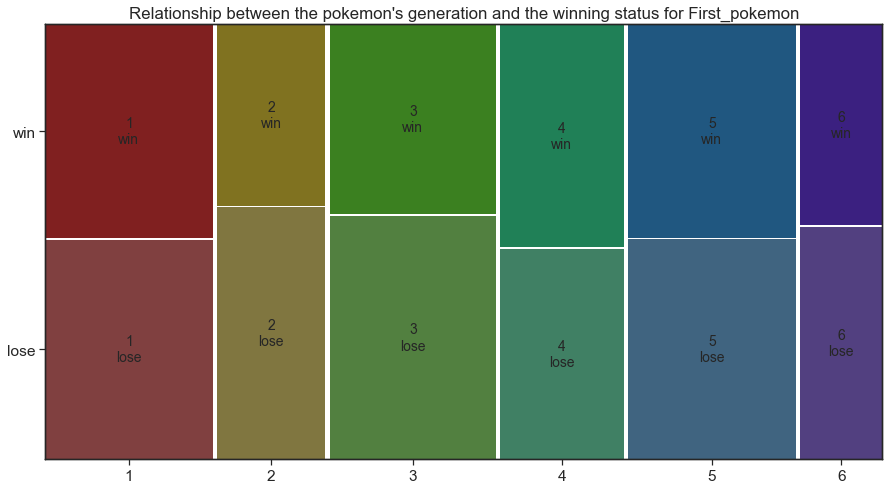

In [21]:
# First_pokemon
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(context='notebook', style='ticks', font_scale=1.4)
t = mosaic(combats.sort_values(["first_poke_gen","is_first_win"]), ['first_poke_gen','is_first_win'], title="Relationship between the pokemon's generation and the winning status for First_pokemon")

#### Answer: 
For `First_pokemon`:
- Overall, there is no explicit association between the pokemon's generation and the winning status in the combats since the win and lose ratio for each generation do not have a large difference
- Generation 2 is distinctly more associated with loses than others
- Generation 4 is more associated with wins than others

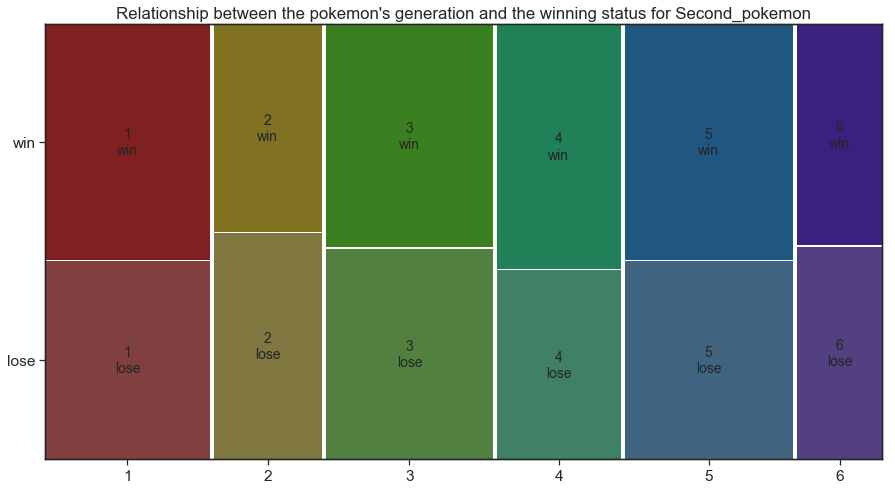

In [22]:
# Second_pokemon
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(context='notebook', style='ticks', font_scale=1.4)
t = mosaic(combats.sort_values("second_poke_gen"), ['second_poke_gen','is_second_win'], title="Relationship between the pokemon's generation and the winning status for Second_pokemon")


#### Answer: 
For `Second_pokemon`:
- Overall, there is no explicit association between the pokemon's generation and the winning status in the combats since the win and lose ratio for each generation do not have a large difference
- Generation 2 is more associated with loses than others
- Generation 4 is distinctly more associated with wins than others

#### <font color='red'>Submission Details:</font>
- ##### <font color='red'> Please submit both uniquename_si618_hw10.ipynb and uniqname_si618_hw10.html SEPARATELY on canvas</font>